# Export RNA to h5ad

In [1]:
import scanpy as sc
import pandas as pd

In [2]:
import os
from pathlib import Path

In [3]:
root_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/"
os.chdir(Path(root_dir) / "scenicplus" / "all")

In [4]:
rna_counts = sc.read_mtx("BICCN_5K_rna.mtx")
rna_counts = rna_counts.T.copy()

In [5]:
rna_counts

AnnData object with n_obs × n_vars = 113924 × 32876

In [6]:
rna_cell_meta = pd.read_csv("BICCN_5K_meta.tsv", sep="\t", header=0, index_col=0)
rna_gene_names = pd.read_csv("BICCN_5K_gene.tsv", sep="\t", header=None, index_col=0)
rna_gene_names.index.name = None

In [7]:
rna_counts.obs = rna_cell_meta
rna_counts.var = rna_gene_names

## Simple processing

In [8]:
# The scenic+ pipeline requires to store count in .raw property of anndata

In [9]:
rna_counts.raw = rna_counts.copy()
sc.pp.normalize_total(rna_counts, target_sum=1e4)
sc.pp.log1p(rna_counts)
sc.pp.highly_variable_genes(rna_counts, min_mean=0.0125, max_mean=3, min_disp=0.5)
rna_counts = rna_counts[:, rna_counts.var.highly_variable]
sc.pp.scale(rna_counts, max_value=10)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


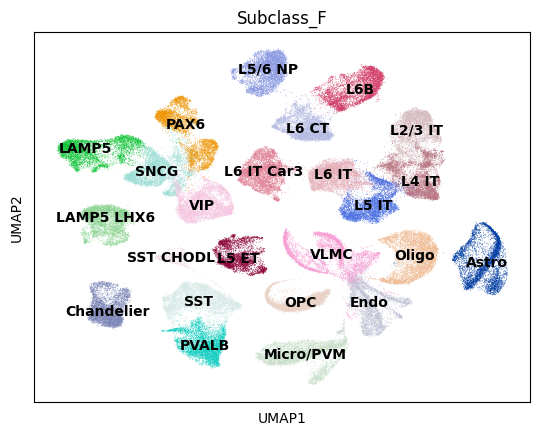

In [10]:
sc.tl.pca(rna_counts)
sc.pp.neighbors(rna_counts)
sc.tl.umap(rna_counts)
sc.pl.umap(rna_counts, color="Subclass_F", legend_loc="on data")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


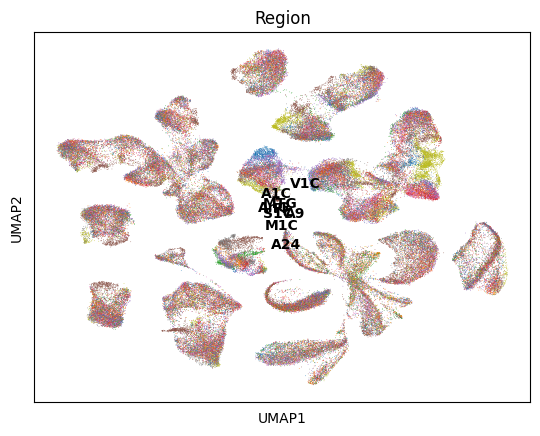

In [11]:
sc.pl.umap(rna_counts, color="Region", legend_loc="on data")

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


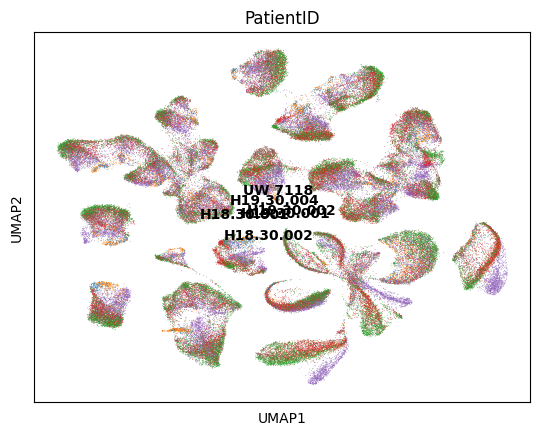

In [12]:
sc.pl.umap(rna_counts, color="PatientID", legend_loc="on data")

In [13]:
rna_counts.write("BICCN_5K_rna.h5ad")